In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
pandas.set_option("precision", 2)

from ProblemInstance import ProblemInstance
from baseline_intra import bl_intra_1
from baseline_request import bl_req_FCFS
from our_approach import leader_follower

In [2]:
def get_ops(problem, plan):
    return problem.operation_per_second(*problem.get_pc_packages_from_plan(*plan))

def adjust_xticks_single_model(names, spaces):
    for i, (n, s) in enumerate(zip(names, spaces)):
        names[i] += " "*s
    return names

In [3]:
fontsize = 15
neurosim_dir = "NetStructure"  # directory store network structure description file following NeuroSim
summary_file = "NeuroSIMOut/summary.csv"  # simulation result get from NeuroSim

In [4]:
n_req = 500
intra_ops = []
inter_ops = []
our_ops = []

single_model_problem = ProblemInstance(neurosim_dir)
single_model_problem.read_nn_profile(summary_file)
N_M = single_model_problem.N_M
for i in range(N_M):
    single_model_problem.get_single_requests(n_req, i)
    plan_intra = bl_intra_1(single_model_problem) 
    intra_ops.append(get_ops(single_model_problem, plan_intra))
    package_inter = bl_req_FCFS(single_model_problem) 
    inter_ops.append(single_model_problem.operation_per_second(*package_inter))
    plan_our = leader_follower(single_model_problem)
    our_ops.append(get_ops(single_model_problem, plan_our))

multi_model_problem = ProblemInstance(neurosim_dir)
multi_model_problem.read_nn_profile(summary_file)
multi_model_problem.get_random_requests(n_req)
plan_intra = bl_intra_1(multi_model_problem) 
intra_ops.append(get_ops(multi_model_problem, plan_intra))
package_inter = bl_req_FCFS(multi_model_problem) 
inter_ops.append(multi_model_problem.operation_per_second(*package_inter))
plan_our = leader_follower(multi_model_problem)
our_ops.append(get_ops(multi_model_problem, plan_our))


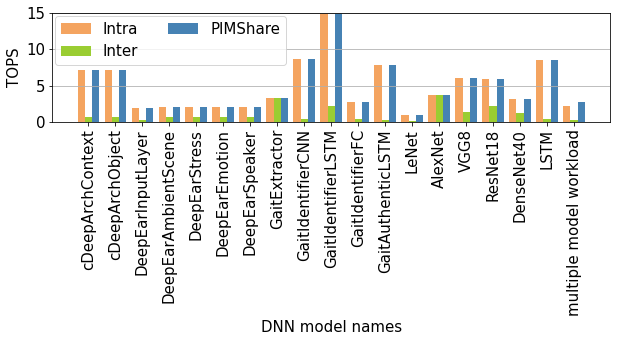

In [5]:
plt.figure(figsize=(10, 2))
names = single_model_problem.profile["DNN"].to_list() + ["multiple model workload"]

n_col = 3
width = 6
width_per_col = width/n_col
base_xticks = numpy.arange(len(names)) * (width+1.5)
plt.bar(base_xticks-width/2, intra_ops, width=width_per_col, label="Intra", color='sandybrown', align='center')
plt.bar(base_xticks-width/2+width_per_col, inter_ops, width=width_per_col, label="Inter", color='yellowgreen',align='center')
plt.bar(base_xticks-width/2+width_per_col*2, our_ops, width=width_per_col, label="PIMShare", color='steelblue',align='center')

plt.xticks(ticks=base_xticks-width_per_col/2, labels=names,rotation=90, fontsize=fontsize, ha="center", va='top')
plt.yticks(fontsize=fontsize)
plt.ylim(0, 15)
plt.xlabel("DNN model names", fontdict={"size":fontsize})
plt.ylabel("TOPS", fontdict={"size":fontsize})
plt.legend(loc=(0.005, 0.52), ncol=2, fontsize=fontsize)
plt.grid(axis='y')
plt.show()

In [6]:
seed = 14
n_req = 500

operations = []

single_intra_ops = intra_ops.copy()
single_intra_ops.pop()

intra_ops = []
inter_ops = []
our_ops = []

multi_model_problem = ProblemInstance(neurosim_dir)
multi_model_problem.read_nn_profile(summary_file)
N_M = multi_model_problem.N_M
nn_ids = numpy.argsort(multi_model_problem.profile["L"])[::-1]
for i in range(1, N_M):
    nn = nn_ids[:i+1]
    p = 1/multi_model_problem.profile["L"][nn].to_numpy()
    multi_model_problem.get_random_requests_unequal(n_req, nn_ids=nn, seed=seed)
    operations.append(multi_model_problem.operations)
    
    plan_intra = bl_intra_1(multi_model_problem) 
    intra_ops.append(get_ops(multi_model_problem, plan_intra))
    
    package_inter = bl_req_FCFS(multi_model_problem) 
    inter_ops.append(multi_model_problem.operation_per_second(*package_inter))
    
    plan_our = leader_follower(multi_model_problem)
    our_ops.append(get_ops(multi_model_problem, plan_our))

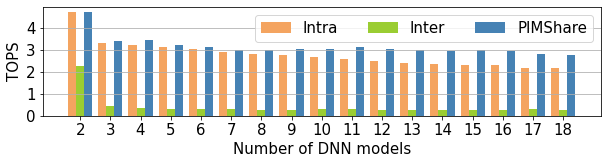

In [7]:
plt.figure(figsize=(10, 2))
names = numpy.arange(2, N_M+1)
n_col = 3
width = 6
width_per_col = width/n_col
base_xticks = numpy.arange(len(names)) * (width+1.5)
plt.bar(base_xticks-width/2, intra_ops, width=width_per_col, label="Intra", color='sandybrown')
plt.bar(base_xticks-width/2 + width_per_col, inter_ops, width=width_per_col, label="Inter", color='yellowgreen')
plt.bar(base_xticks-width/2 + width_per_col*2, our_ops, width=width_per_col, label="PIMShare", color='steelblue')

plt.xticks(ticks=base_xticks-width_per_col/2, labels=names,rotation=0, fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel("Number of DNN models", fontsize=fontsize)
plt.ylabel("TOPS", fontsize=fontsize)
plt.legend(ncol=3, fontsize=fontsize)
plt.grid(axis='y')
plt.show()

In [8]:
seed = 1
n_req = 500
n_req_step = 20
n_req_start = n_req//n_req_step

operations = []

intra_ops = []
inter_ops = []
our_ops = []

multi_model_problem = ProblemInstance(neurosim_dir)
multi_model_problem.read_nn_profile(summary_file)
N_M = multi_model_problem.N_M
for i in range(n_req_start, n_req+n_req//n_req_step, n_req//n_req_step):
    multi_model_problem.get_random_requests(i, seed=seed)
    operations.append(multi_model_problem.operations)
    
    plan_intra = bl_intra_1(multi_model_problem) 
    intra_ops.append(get_ops(multi_model_problem, plan_intra))
    
    package_inter = bl_req_FCFS(multi_model_problem) 
    inter_ops.append(multi_model_problem.operation_per_second(*package_inter))
    
    plan_our = leader_follower(multi_model_problem)
    our_ops.append(get_ops(multi_model_problem, plan_our))

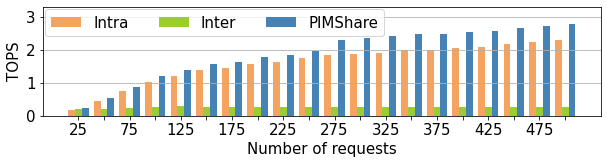

In [9]:
plt.figure(figsize=(10, 2))
names = numpy.arange(n_req_start, n_req+n_req//n_req_step, n_req//n_req_step)
n_col = 3
width = 6
width_per_col = width/n_col
base_xticks = numpy.arange(len(names)) * (width+1.5)
plt.bar(base_xticks-width/2, intra_ops, width=width_per_col, label="Intra", color='sandybrown')
plt.bar(base_xticks-width/2 + width_per_col, inter_ops, width=width_per_col, label="Inter", color='yellowgreen')
plt.bar(base_xticks-width/2 + width_per_col*2, our_ops, width=width_per_col, label="PIMShare", color='steelblue')
plt.xticks(ticks=base_xticks-width_per_col/2, labels=[n if i%2==0 else "" for i,n in enumerate(names)],rotation=0, fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel("Number of requests", fontsize=fontsize)
plt.ylabel("TOPS", fontsize=fontsize)
plt.ylim(0, 3.3)
plt.legend(loc=(0.005, 0.73),ncol=3.5, fontsize=fontsize)
plt.grid(axis='y')
plt.show()